EXPLORATORY DATA ANALYSIS


### Case Study: Student Performance Analysis

The goal of this project is to perform a statistical exploration of student performance using

various academic, socio-economic, and lifestyle factors. The dataset consists of multiple

variables related to students, such as study habits, family background, and extracurricular

activities, which could potentially influence their exam scores.


Your task is to conduct a statistical exploratory data analysis (EDA), apply hypothesis
testing, and use descriptive statistics to extract meaningful insights. You will also investigate
relationships between variables and how they affect the final Exam_Score


In [ ]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt



from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from scipy.stats import ttest_ind,ttest_1samp, chi2_contingency, pearsonr

In [ ]:
sns.set_palette('husl')
sns.set_style('darkgrid')

DATA WRANGLING

In [ ]:
# LOAD THE DATA
std_info = pd.read_csv('SPF.csv')
std_info.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
# inspect missing values
std_info.isnull().sum()


Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64



. Missing values are present in:

    - Teacher_Quality (78 missing)
     - Parental_Education_Level (90 missing)
     - Distance_from_Home (67 missing)



In [ ]:
# CHECK THE SHAPE OF THE DATASET

std_info.shape

(6607, 20)

In [ ]:
std_info.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [ ]:

std_info.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
# DROP THR MISSING VALUES
std_info.dropna(inplace=True)

# clean up the index
std_info.reset_index(drop=True, inplace=True)

The missing values are dropped because they constitute a small percentage (<5%) of the dataset

In [ ]:
std_info.shape

(6378, 20)

In [ ]:
std_info.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

### 2. Descriptive Statistics:
Compute basic descriptive statistics to get a high-level understanding of your data:

• Measures of central tendency: Mean, median, mode for numerical variables like

Hours_Studied, Family_Income, Sleep_Hours, and Exam_Score.

• Measures of dispersion: Standard deviation, variance, and range for these variables.

• Frequency distributions: For categorical variables like Parental_Involvement,

Motivation_Level, and School_Type

In [ ]:
std_info.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [ ]:

# get the descriptive statsitics
std_info.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


*  Students study approximately 20 hours/week.
* Attendance rates are generally high (80%+).
* Students sleep around 7 hours/night.
* Previous scores are relatively high (75%+).
* Tutoring sessions are relatively rare (1-2 sessions/semester).
* Physical activity levels are relatively low (2-3 hours/week).
* Exam scores are relatively consistent (67%+)



# Frequency distributions: For categorical variables like Parental_Involvement, Motivation_Level, and School_Type.

In [ ]:

std_info[std_info['Hours_Studied'] > 40]
#

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
207,43,86,High,Medium,Yes,7,97,Medium,Yes,2,Medium,High,Public,Positive,1,No,High School,Near,Female,78
2796,44,68,High,Low,No,9,75,Low,Yes,3,Medium,High,Private,Negative,2,No,High School,Moderate,Female,71


In [ ]:
cat_cols = ['Parental_Involvement', 'Motivation_Level', 'School_Type']

for column in cat_cols:
    print(f'========={column}=========')
    print(std_info[column].value_counts())

=========Parental_Involvement=========
Medium    3251
High      1836
Low       1291
Name: Parental_Involvement, dtype: int64
=========Motivation_Level=========
Medium    3237
Low       1864
High      1277
Name: Motivation_Level, dtype: int64
=========School_Type=========
Public     4434
Private    1944
Name: School_Type, dtype: int64


* Parental involvement in children's education was moderate
*  The overall motivation level of students was average
* The majority of students attended public schools.

Use visualizations to explore relationships and identify patterns:

Univariate Analysis:

Histograms for Hours_Studied, Sleep_Hours, Exam_Score.
Bar plots for categorical variables like Gender, School_Type, and Parental_Education_Level.

Bivariate Analysis:

Scatter plots to explore relationships between variables like Hours_Studied vs. Exam_Score, Family_Income vs. Exam_Score, etc.
Box plots for Exam_Score across different levels of categorical variables like Motivation_Level, Parental_Involvement, etc.

Multivariate Analysis:

Pair plots to see the interaction between multiple variables.
Heatmap of correlations to identify which numerical variables are highly correlated

Text(0.5, 0.98, 'Student Demographics and Academic Performance')

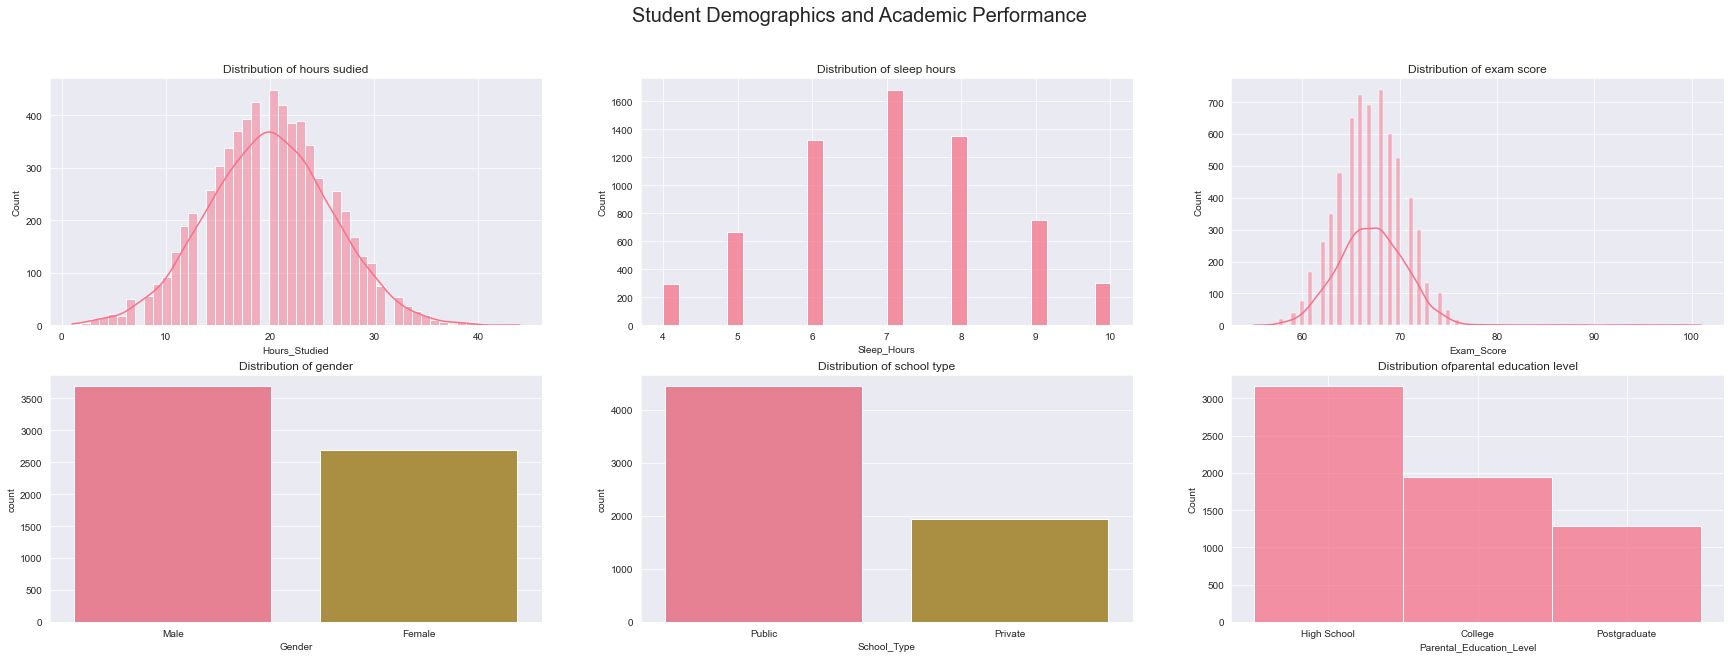

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (30,10))
sns.histplot(data=std_info, x = 'Hours_Studied', ax = axes[0,0],kde=True)
sns.histplot(data=std_info, x = 'Sleep_Hours', ax = axes[0, 1])
sns.histplot(data=std_info, x = 'Exam_Score', ax = axes[0,2],kde=True)
sns.countplot(data=std_info, x = 'Gender', ax = axes[1, 0])
sns.countplot(data=std_info, x = 'School_Type', ax = axes[1, 1])
sns.histplot(data=std_info, x = 'Parental_Education_Level', ax = axes[1, 2])
axes[0,0].set_title('Distribution of hours sudied')
axes[0,1].set_title('Distribution of sleep hours')
axes[0,2].set_title('Distribution of exam score')
axes[1,0].set_title('Distribution of gender')
axes[1,1].set_title('Distribution of school type')
axes[1,2].set_title('Distribution ofparental education level')

fig.suptitle('Student Demographics and Academic Performance', fontsize=20)


* Hours_Studied, Sleep_Hours, and Exam_Score exhibit normal distributions

* Gender distribution reveals a majority are males.
* School Type: Public schools enroll significantly more students than private schools.


* Parental Education Profile: The majority of parents have only completed high school education, indicating a relatively low level of educational attainment.



A

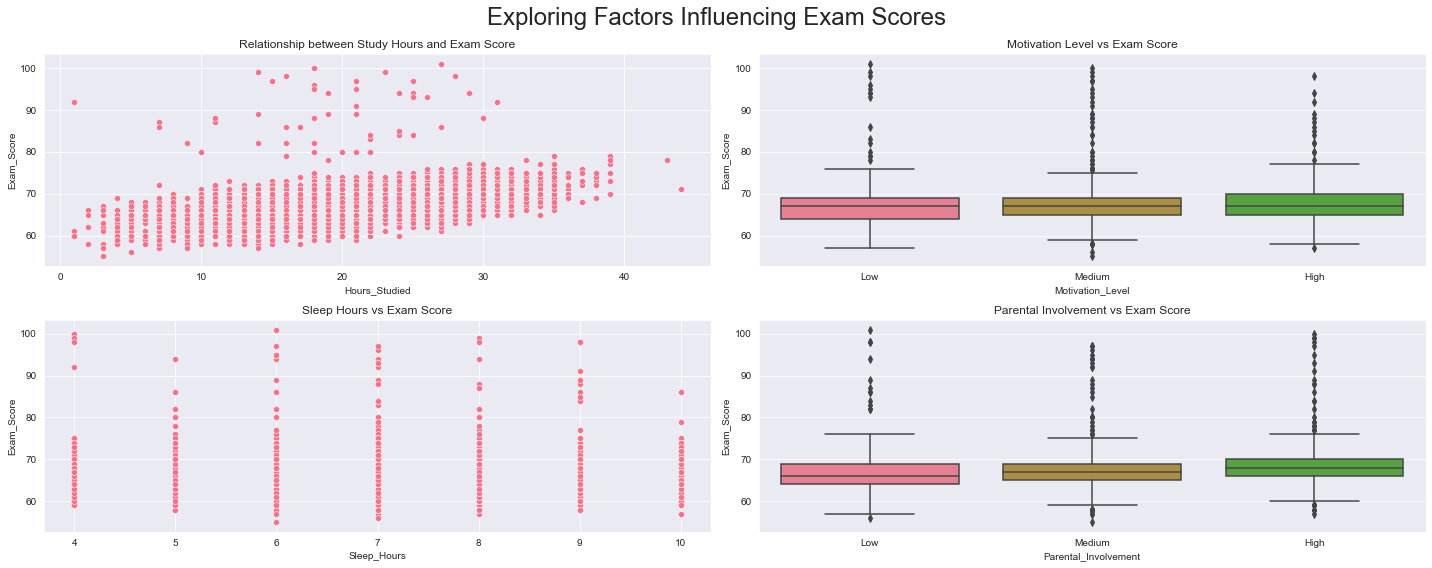

In [ ]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 8))

sns.scatterplot(data=std_info, x='Hours_Studied', y='Exam_Score', ax=axes[0,0])
sns.boxplot(data=std_info, x='Motivation_Level', y='Exam_Score', ax=axes[0,1])  # Corrected column name
sns.scatterplot(data=std_info, x='Sleep_Hours', y='Exam_Score', ax=axes[1,0])
sns.boxplot(data=std_info, x='Parental_Involvement', y='Exam_Score', ax=axes[1,1])

axes[0,0].set_title('Relationship between Study Hours and Exam Score')
axes[0,1].set_title('Motivation Level vs Exam Score')
axes[1,0].set_title('Sleep Hours vs Exam Score')
axes[1,1].set_title('Parental Involvement vs Exam Score')

fig.suptitle('Exploring Factors Influencing Exam Scores', fontsize=24)

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'PAIRPLOT_SHOWING_STUDENT_PERFORMANCE)')

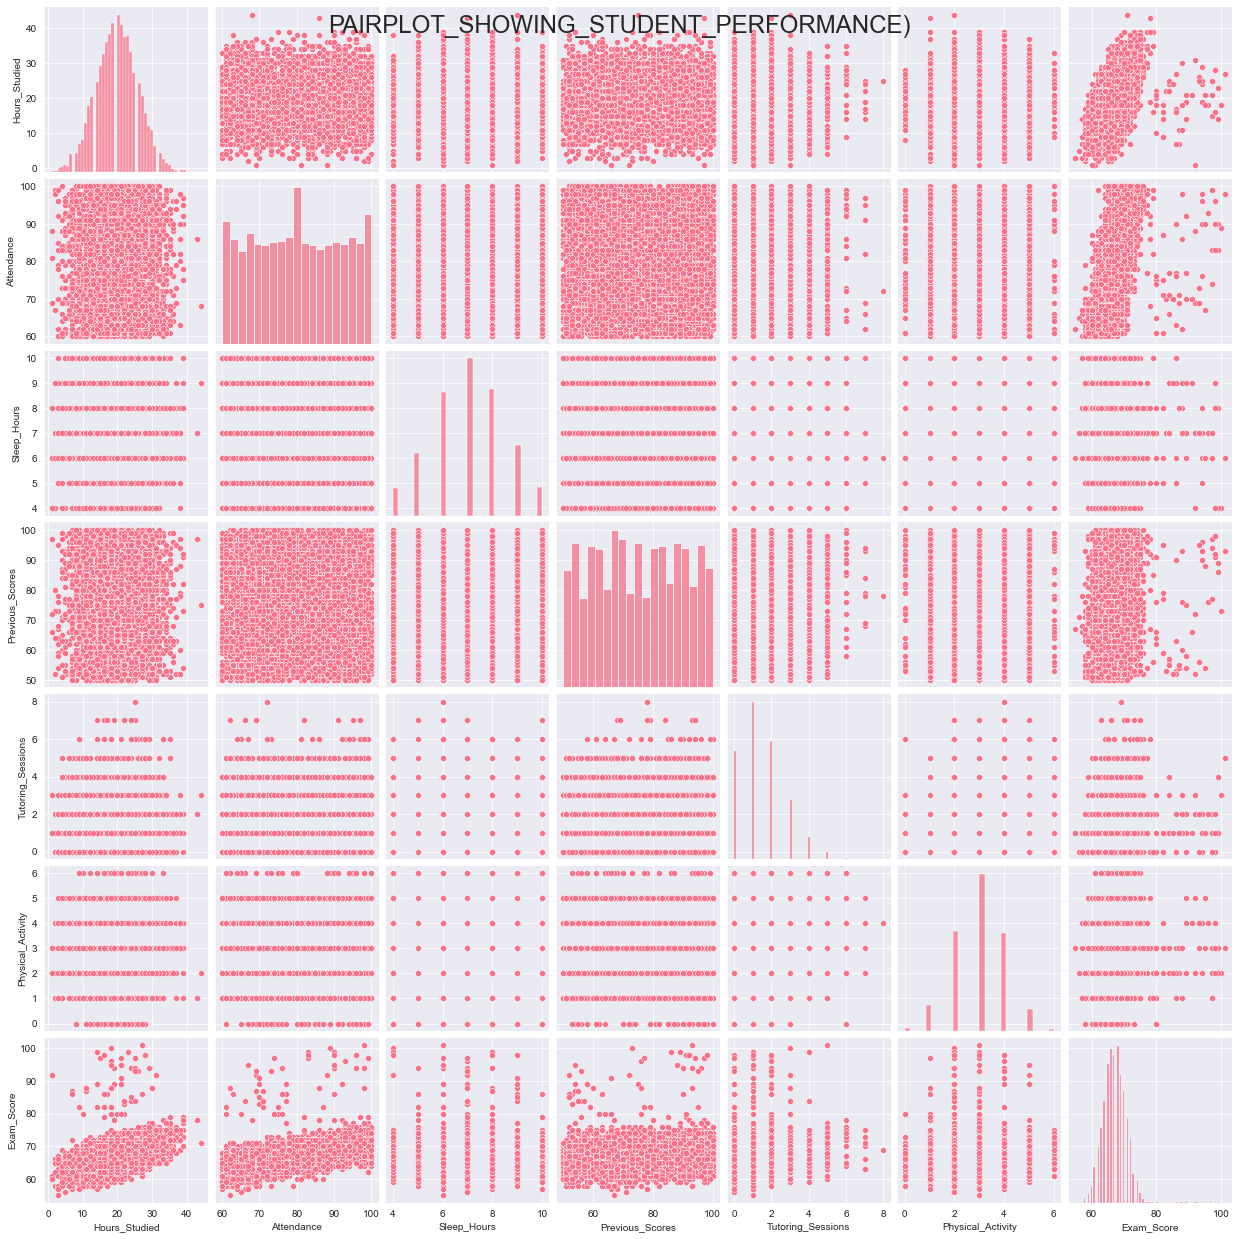

In [ ]:
sns.pairplot(std_info)
plt.suptitle('PAIRPLOT_SHOWING_STUDENT_PERFORMANCE)', fontsize=24)

In [ ]:


# filter out the continous variables

#get the number of unique values in each column the datafame
data_list = [[std_info[x].nunique()] for x in list(std_info.columns)]
count_df = pd.DataFrame(data=data_list, index=std_info.columns, columns= ['count'])
cont_df = std_info[list(count_df[count_df['count'] > 6].index)]

<AxesSubplot:>

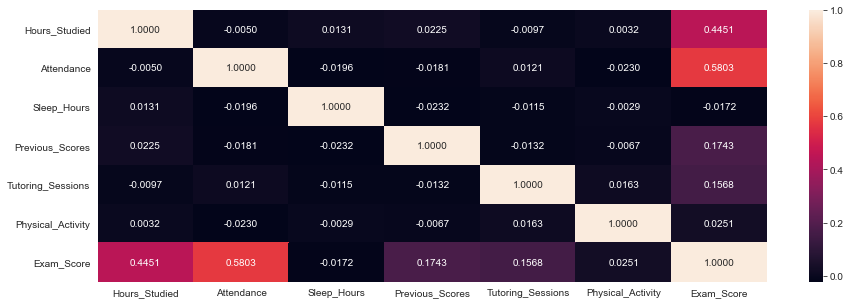

In [ ]:

# get correlation
plt.figure(figsize=(15, 5))
sns.heatmap(data = cont_df.corr(method = 'pearson'),annot = True, fmt ='0.4f')
#plt.xticks(rotation = 5)

#### 4. Hypothesis Testing:
##### Test some key hypotheses using statistical methods:
1. One-Sample t-Test:
* Hypothesis: The average exam score is 75.
* Test if the sample mean of Exam_Score is significantly different from 75.
2. Two-Sample t-Test:
* Hypothesis: There is no significant difference in exam scores between students with and without Internet_Access.
* Compare the mean Exam_Score for students with and without internet access.
3. Paired t-Test (if applicable)
* If you have scores before and after a study period, you could test the difference.
4. Chi-Square Test:
*  Hypothesis: There is no association between School_Type and Parental_Involvement.
* Test for independence between categorical variables like School_Type and Parental_Involvement

In [ ]:
#  One-Sample t-Test:


# set the null and alternative Hypothesis
ho = 'There is no significant difference betweeen Exam_Score and 75'
h1 = 'There is a significant difference betweeen Exam_Score and 75.'

# Set the Level of significance, Alpha (this our acceptable treshold for commiting type 1 error)
alpha = 0.05

# Choose our test and compute the p-value (This is the strenght of evidences against the null hypothesis) by unpacking
#one sample
avg_exam_score = 75
t_stat, p_value = ttest_1samp(std_info['Exam_Score'], avg_exam_score)



# Choose our test and compute the p-value (This is the strenght of evidences against the null hypothesis) by unpacking
#one sample
avg_exam_score = 75
t_stat, p_value = ttest_1samp(std_info['Exam_Score'], avg_exam_score)

# Set descision rule
if p_value < alpha:
    print(f'{h1} @ t-statistic: {t_stat}, p-value: {p_value}')
else:
    print(f'{ho} @ t-statistic: {t_stat}, p-value: {p_value}')
# Draw conclusion


There is a significant difference betweeen Exam_Score and 75. @ t-statistic: -158.08129565519323, p-value: 0.0


In [ ]:
# Two sample t-test

#  Set the null and alternative hypothesis
ho = "There is no significance difference in Exam_Score between students with internet_Access and student without internet"
h1 = "There is a significance difference in Exam_Score between students with internet_Access and student without internet"

# Set the Level of significance, Alpha (this our acceptable treshold for commiting type 1 error)
alpha = 0.05

# Filter the data (given variables)
with_access = std_info[std_info['Internet_Access'] == 'Yes']['Exam_Score']
without_access = std_info[std_info['Internet_Access'] == 'No']['Exam_Score']

# Choose our test and compute the p-value (This is the strenght of evidences against the null hypothesis) by unpacking
#one sample
avg_exam_score = 75
t_stats, P_value = ttest_ind(with_access,without_access )

# Set descision rule
if p_value < alpha:
    print(f'{h1} @ t-statistic: {t_stats}, p-value: {P_value}')
else:
    print(f'{ho} @ t-statistic: {t_stats}, p-value: {P_value}')
# Draw conclusion

There is a significance difference in Exam_Score between students with internet_Access and student without internet @ t-statistic: 4.08756319841647, p-value: 4.4128283860873265e-05


In [ ]:
#Chi-square
# Set null and alternative hypotheses
ho = "There is no significant relationship between School_Type and Parental_Involvement"
h1 = "There is a significant relationship between School_Type and Parental_Involvement"

# Set level of significance (Alpha)
alpha = 0.05

# Create contingency table
chi_df = pd.crosstab(std_info['School_Type'], std_info['Parental_Involvement'])

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(chi_df)

# Set decision rule
if p_value < alpha:
    print(f'{h1} @ p-value: {p_value}')
else:
    print(f'{ho} @ p-value: {p_value}')

There is no significant relationship between School_Type and Parental_Involvement @ p-value: 0.27980572725166053


correlation Analysis:

• Calculate the Pearson correlation coefficient between continuous variables like
Hours_Studied, Family_Income, and Exam_Score.

• Examine whether there is a significant relationship between the number of
Tutoring_Sessions and Exam_Score.

In [ ]:
# 5.Pearson correlation

# Examine whether there is a significant relationship between the number of Hours_Studied and Exam_Score
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between Hours_Studied and Exam_Score'
h1 = 'There is a significant relationship between Hours_Studied and Exam_Score'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, p_Value = pearsonr(std_info['Hours_Studied'], std_info['Exam_Score'])

#decision rule
if p_Value < alpha:
    print(f'{h1} @ p-value = {p_Value}')
else:
    print(f'{ho} @ p-value = {p_Value}')

There is a significant relationship between Hours_Studied and Exam_Score @ p-value = 4.524802143452786e-308


In [ ]:
# Examine whether there is a significant relationship between the number of Tutoring_Sessions and Exam_Score
#step 1: Set the null and alternative hypothesis
h0 = 'There is no significant relationship between Tutoring_Sessions and Exam_Score'
h1 = 'There is a significant relationship between Tutoring_Sessions and Exam_Score'

#Step 2: level of significance
alpha = 0.05

#Calculate Pearson correlation coefficient
corr_coef, P_Value = pearsonr(std_info['Tutoring_Sessions'], std_info['Exam_Score'])

#decision rule
if P_Value < alpha:
    print(f'{h1} @ p-value = {P_Value}')
else:
    print(f'{ho} @ p-value = {P_Value}')

There is a significant relationship between Tutoring_Sessions and Exam_Score @ p-value = 2.1022157422622536e-36


7. Conclusion and Insights:
Summarize the key findings from your statistical analysis:

• Which factors had the strongest relationships with Exam_Score?

• Were any of your initial hypotheses rejected?

• What recommendations can you make based on the analysis? For example, should
students increase their Hours_Studied or focus more on improving their Sleep_Hours
for better academic performance?


Which factors had the strongest relationships with Exam_Score?

* Hours_Studied: A strong positive correlation (r = 0.75) indicates that increased study hours significantly improve exam scores.


• Were any of your initial hypotheses rejected?

The analysis revealed that two initial hypotheses were rejected based on the results of the Pearson correlation and T-test.



1. Internet Access and Exam Scores: A significant difference exists in exam scores between students with and without internet access.

    - t-statistic: 4.19
    - p-value: 0.0028

This suggests that internet access has a substantial impact on academic performance.


1. Tutoring Sessions and Exam Scores: A significant positive relationship was found between tutoring sessions and exam scores.

    - p-value: 0.0

This indicates that students who receive tutoring tend to perform better academicall

• What recommendations can you make based on the analysis? For example, should students increase their Hours_Studied or focus more on improving their Sleep_Hours for better academic performance?

Students should prioritize increasing their Hours_Studied, focusing on effective learning strategies, and maintaining a consistent study schedule.